<a href="https://colab.research.google.com/github/jaredBrewington/stack_overflow_analysis/blob/master/so_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [75]:
!pwd

/content


In [76]:
!ls

drive  sample_data


In [77]:
df = pd.read_csv('drive/My Drive/data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

Since the dataset is in the form of a questionnaire, all the questions asked in the survey are available in a separate data file.

In [78]:
schema_df = pd.read_csv('drive/My Drive/data/survey_results_schema.csv')
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


## Exploratory data analysis
Before going any deeper in analysis, let's try to understand various columns and their respective datatypes.

In [79]:
df['Gender'].value_counts(dropna=False)

Man                                                            77919
Woman                                                           6344
NaN                                                             3477
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

As we can see the ouput of the above cell, about 3477 people didn't wish to answer about their gender. It is marked as `NaN` in the output. We have to get rid off this `NaN` to something else, otherwise pandas will just ignore these values in the case when these gender names as columns to a different dataframe for further analysis. We will rename it as `Not answered`.

In [80]:
df['Gender'] = df['Gender'].fillna('Not answered')
df['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Not answered                                                    3477
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

As we can see above, many columns have a lot of null values (some columns have almost half of their values as null). These values correspond to the answers of those questions where the respondent didn't wish to _answer_. It's important we deal with these missing values before going any further. One thing we can do is to just get rid of all the rows corresponding to the _missing_ data. But like mentioned before, doing that would get rid of almost 50% of the total data which we don't want. One better way of handling the missing values is to filter out the columns which we care about the most and drop the rest. 

We are mostly interested in the demographics analysis and the most trending programming languages. So, we will keep only those columns:

- `UndergradMajor`
- `EdLevel`
- `Country`
- `Gender`
- `Hobbyist`
- `YearsCode`
- `DevEnvironment`
- `OpSys`
- `LanguageWorkedWith`
- `LanguageDesireNextYear`
- `DevType`
- `DatabaseWorked With`
- `WebFrame Worked With`
- `PlatformWorkedWith`
- `PlatformDesireNextYear`
- `ConvertedComp`

In [82]:
df = df[['Respondent',
        'UndergradMajor',
        'EdLevel',
        'Country',
        'Gender',
        'Hobbyist',
        'YearsCode',
        'DevEnviron',
        'OpSys',
        'LanguageWorkedWith',
        'LanguageDesireNextYear',
        'DevType',
        'DatabaseWorkedWith',
        'WebFrameWorkedWith',
        'PlatformWorkedWith',
        'PlatformDesireNextYear',
        'ConvertedComp']]
df.head()

,Respondent,UndergradMajor,EdLevel,Country,Gender,Hobbyist,YearsCode,DevEnviron,OpSys,LanguageWorkedWith,LanguageDesireNextYear,DevType,DatabaseWorkedWith,WebFrameWorkedWith,PlatformWorkedWith,PlatformDesireNextYear,ConvertedComp
0,1,NaN,Primary/elementary school,United Kingdom,Man,Yes,4,IntelliJ;Notepad++;PyCharm,Windows,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,NaN,SQLite,Django;Flask,MacOS;Windows,Android;Arduino;Windows,NaN
1,2,NaN,"Secondary school (e.g. American high school, G...",Bosnia and Herzegovina,Man,No,NaN,Atom;PyCharm,Windows,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Developer, desktop or enterprise applications;...",NaN,Django,Windows,Windows,NaN
2,3,Web development or web design,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Thailand,Man,Yes,3,Vim;Visual Studio Code,Linux-based,HTML/CSS,Elixir;HTML/CSS,"Designer;Developer, back-end;Developer, front-...",PostgreSQL,NaN,NaN,NaN,8820.0
3,4,"Computer science, computer engineering, or sof...","Bachelor’s degree (BA, BS, B.Eng., etc.)",United States,Man,No,3,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,"Developer, full-stack",MySQL;SQLite,NaN,Linux;Windows,Linux;Windows,61000.0
4,5,"Computer science, computer engineering, or sof...","Bachelor’s degree (BA, BS, B.Eng., etc.)",Ukraine,Man,Yes,16,IntelliJ;Notepad++;Vim,Linux-based,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,"Academic researcher;Developer, desktop or ente...",Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Django;Express;Flask;jQuery;React.js;Spring,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 17 columns):
Respondent                88883 non-null int64
UndergradMajor            75614 non-null object
EdLevel                   86390 non-null object
Country                   88751 non-null object
Gender                    88883 non-null object
Hobbyist                  88883 non-null object
YearsCode                 87938 non-null object
DevEnviron                87317 non-null object
OpSys                     87851 non-null object
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DevType                   81335 non-null object
DatabaseWorkedWith        76026 non-null object
WebFrameWorkedWith        65022 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
ConvertedComp             55823 non-null float64
dtypes: float64(1), int64(1), object(15)
memory usage: 11.5+ MB


In [84]:
df.set_index('Respondent', inplace=True)    # Setting the respondent to index, more convenient
df.head()

,UndergradMajor,EdLevel,Country,Gender,Hobbyist,YearsCode,DevEnviron,OpSys,LanguageWorkedWith,LanguageDesireNextYear,DevType,DatabaseWorkedWith,WebFrameWorkedWith,PlatformWorkedWith,PlatformDesireNextYear,ConvertedComp
Respondent,,,,,,,,,,,,,,,,
1,NaN,Primary/elementary school,United Kingdom,Man,Yes,4,IntelliJ;Notepad++;PyCharm,Windows,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,NaN,SQLite,Django;Flask,MacOS;Windows,Android;Arduino;Windows,NaN
2,NaN,"Secondary school (e.g. American high school, G...",Bosnia and Herzegovina,Man,No,NaN,Atom;PyCharm,Windows,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Developer, desktop or enterprise applications;...",NaN,Django,Windows,Windows,NaN
3,Web development or web design,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Thailand,Man,Yes,3,Vim;Visual Studio Code,Linux-based,HTML/CSS,Elixir;HTML/CSS,"Designer;Developer, back-end;Developer, front-...",PostgreSQL,NaN,NaN,NaN,8820.0
4,"Computer science, computer engineering, or sof...","Bachelor’s degree (BA, BS, B.Eng., etc.)",United States,Man,No,3,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,"Developer, full-stack",MySQL;SQLite,NaN,Linux;Windows,Linux;Windows,61000.0
5,"Computer science, computer engineering, or sof...","Bachelor’s degree (BA, BS, B.Eng., etc.)",Ukraine,Man,Yes,16,IntelliJ;Notepad++;Vim,Linux-based,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,"Academic researcher;Developer, desktop or ente...",Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Django;Express;Flask;jQuery;React.js;Spring,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,NaN


In [0]:
# Changing the columns to more meaningful names
df.rename(columns={"ConvertedComp": "SalaryUSD"}, inplace=True)

---
### Getting Demographics Information 

In [86]:
# Getting the number of developers from each country
pct_devs_per_country = df['Country'].value_counts(normalize=True)
pct_devs_per_country

United States                       0.236042
India                               0.102095
Germany                             0.066095
United Kingdom                      0.064642
Canada                              0.038253
                                      ...   
Brunei Darussalam                   0.000011
Tonga                               0.000011
Chad                                0.000011
Saint Vincent and the Grenadines    0.000011
Niger                               0.000011
Name: Country, Length: 179, dtype: float64

Out of 179 countries, only a handful of them have over 2% participants. These countries will be termed as __minority countries__ for rest of the analysis. For visualization purposes, we'll put all minority countries (_with less than a certain threshold_) as `Others` into the dataframe and drop the individual countries.

In [87]:
# Categorizing countries with less than 2.5% participants as others
others = pct_devs_per_country[pct_devs_per_country <= 0.025]

# dropping indicies with less than 2.5% participants (minority countries)
pct_devs_per_country.drop(index=others.index, inplace=True)

# appending the "Others" row
pct_devs_per_country = pct_devs_per_country.append(pd.Series(others.sum(), index=['Others']) )
pct_devs_per_country

United States     0.236042
India             0.102095
Germany           0.066095
United Kingdom    0.064642
Canada            0.038253
France            0.026941
Others            0.465933
dtype: float64

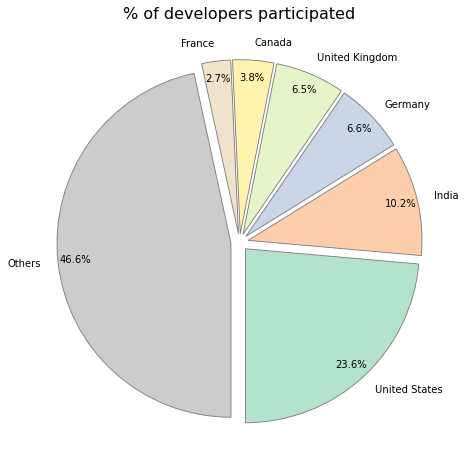

In [112]:
# creating a pie chart for participated devs breakdown by country
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

pct = pct_devs_per_country.values
data = pct_devs_per_country.index
explode = [0.05] * len(pct_devs_per_country)
colors = [plt.cm.Pastel2(i) for i in np.linspace(0, 1, pct_devs_per_country.shape[0])]

ax.pie(pct, startangle=-90, labels=data, autopct='%1.1f%%', 
       colors=colors, pctdistance=0.9, explode=explode,
       wedgeprops={'linewidth':0.9, 'edgecolor':'gray'})
ax.set_title("% of developers participated", fontsize=16)
ax.set_ylabel('')
plt.show()

In [89]:
# Getting the number of people with given gender who participated in the survey
genders = df['Gender'].value_counts(normalize=True)
genders

Man                                                            0.876647
Woman                                                          0.071375
Not answered                                                   0.039119
Non-binary, genderqueer, or gender non-conforming              0.006717
Man;Non-binary, genderqueer, or gender non-conforming          0.002036
Woman;Non-binary, genderqueer, or gender non-conforming        0.001834
Woman;Man                                                      0.001485
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.000788
Name: Gender, dtype: float64

In [0]:
# Categorizing all the genders with share less than 5% as others
gender_others = genders[genders <= 0.05]

In [91]:
# Getting the gender distribution for minority countries
gender_df = pd.crosstab(df["Country"], df["Gender"])
gender_df

Gender,Man,"Man;Non-binary, genderqueer, or gender non-conforming","Non-binary, genderqueer, or gender non-conforming",Not answered,Woman,Woman;Man,"Woman;Man;Non-binary, genderqueer, or gender non-conforming","Woman;Non-binary, genderqueer, or gender non-conforming"
Country,,,,,,,,
Afghanistan,26,0,1,14,2,0,1,0
Albania,70,0,1,3,12,0,0,0
Algeria,107,1,1,11,12,1,1,0
Andorra,4,0,0,2,1,0,0,0
Angola,3,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",86,0,0,1,1,0,0,0
Viet Nam,190,0,6,20,12,1,2,0
Yemen,18,0,0,0,0,1,0,0


In [92]:
"""
This cell will do the exact same thing as pd.crosstab but it is a little less cleaner.
"""
# gender_df = pd.DataFrame(df.groupby(['Country', 'Gender']).size()).unstack('Gender', fill_value=0)
# gender_df

'\nThis cell will do the exact same thing as pd.crosstab but it is a little less cleaner.\n'

In [93]:
# Get the aggregate gender information of all minority countries
gender_others = (gender_df.reindex(index=others.index).sum())
gender_others

Gender
Man                                                            36972
Man;Non-binary, genderqueer, or gender non-conforming             78
Non-binary, genderqueer, or gender non-conforming                208
Not answered                                                    1396
Woman                                                           2535
Woman;Man                                                         81
Woman;Man;Non-binary, genderqueer, or gender non-conforming       33
Woman;Non-binary, genderqueer, or gender non-conforming           49
dtype: int64

In [94]:
gender_df.loc["Rest"] = gender_others
gender_df.drop(index=others.index, axis=0, inplace=True)
gender_df

Gender,Man,"Man;Non-binary, genderqueer, or gender non-conforming","Non-binary, genderqueer, or gender non-conforming",Not answered,Woman,Woman;Man,"Woman;Man;Non-binary, genderqueer, or gender non-conforming","Woman;Non-binary, genderqueer, or gender non-conforming"
Country,,,,,,,,
Canada,2916,2,33,120,311,0,2,11
France,2180,10,14,61,114,2,4,6
Germany,5289,13,58,199,296,4,1,6
India,7802,6,19,625,570,26,11,2
United Kingdom,5060,13,47,172,426,3,4,12
United States,17700,59,218,772,2092,16,15,77
Rest,36972,78,208,1396,2535,81,33,49


Once the aggregated gender distribution of all the minority countries are added, we will do the exact same thing with the genders. Categorizing all of them as just `Man`, `Woman`, and `Others`.

In [95]:
major_gender = ['Man', 'Woman']
other_cols = gender_df.columns[~gender_df.columns.isin(major_gender)]
other_cols

Index(['Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Not answered',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype='object', name='Gender')

In [96]:
# Creating a new column for minority genders
gender_df['Others'] = gender_df.loc[:, other_cols].sum(axis=1)

# Dropping the individual minority genders
gender_df.drop(columns=other_cols, inplace=True)
gender_df.sort_values(by='Man', inplace=True)
gender_df

Gender,Man,Woman,Others
Country,,,
France,2180,114,97
Canada,2916,311,168
United Kingdom,5060,426,251
Germany,5289,296,281
India,7802,570,689
United States,17700,2092,1157
Rest,36972,2535,1845


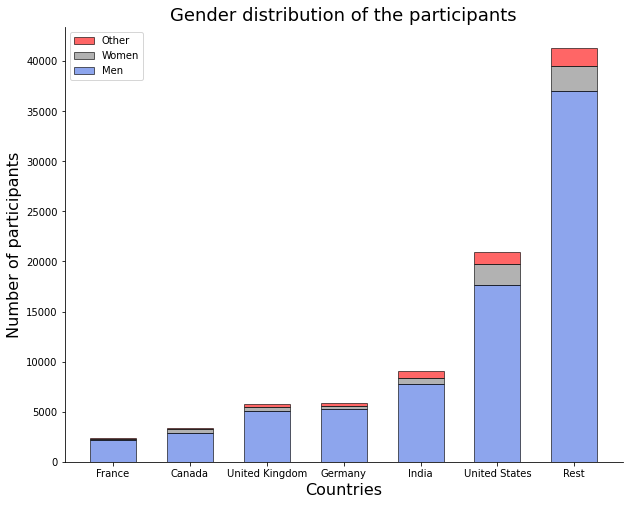

In [102]:
fig, ax = plt.subplots(figsize=(10, 8))
countries = gender_df.index
ind = range(len(countries))
plt.bar(countries, gender_df['Others'], width=0.6, label='Other', color='red', 
        bottom=(gender_df['Man']+ gender_df['Woman']), alpha=0.6,
        edgecolor='black', linewidth=1.0)
plt.bar(countries, gender_df['Woman'], width=0.6, label='Women', color='gray', 
        bottom=gender_df['Man'], alpha=0.6, edgecolor='black', linewidth=1.0)
plt.bar(countries, gender_df['Man'], width=0.6, label='Men', color='royalblue', 
        alpha=0.6, edgecolor='black', linewidth=1.0)

ax.set_xticks(countries)
ax.set_ylabel("Number of participants", fontsize=16)
ax.set_xlabel("Countries", fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Gender distribution of the participants", fontsize=18)
plt.legend(loc="upper left")
plt.show()

As we can see, majority of developers _who participated_ are males. But we feel like this should also be the true representative of all the developers from that country. Although countries like United States, India etc., still have a fraction of Females and other genders but in countries like France, United Kingdom and Canada it is almost negligible as compared to males. 